Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not




### Import libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Reading the input csv file

In [ ]:
Airlines = pd.read_excel('/content/EastWestAirlines-3.xlsx',sheet_name='data')
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Checking the columns

In [ ]:
Airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

### Remove the ID column from the dataset, since it doesn't contribute to clustering the dataset and storing the dataset in a new variable

In [ ]:
Airlines1 = Airlines.drop('ID#', axis=1)

### New dataset

In [ ]:
Airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Cheking null values and the datatypes

In [ ]:
Airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### Checking for duplicate Value

In [ ]:
Airlines1[Airlines.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


### Checking for outliers with boxplot

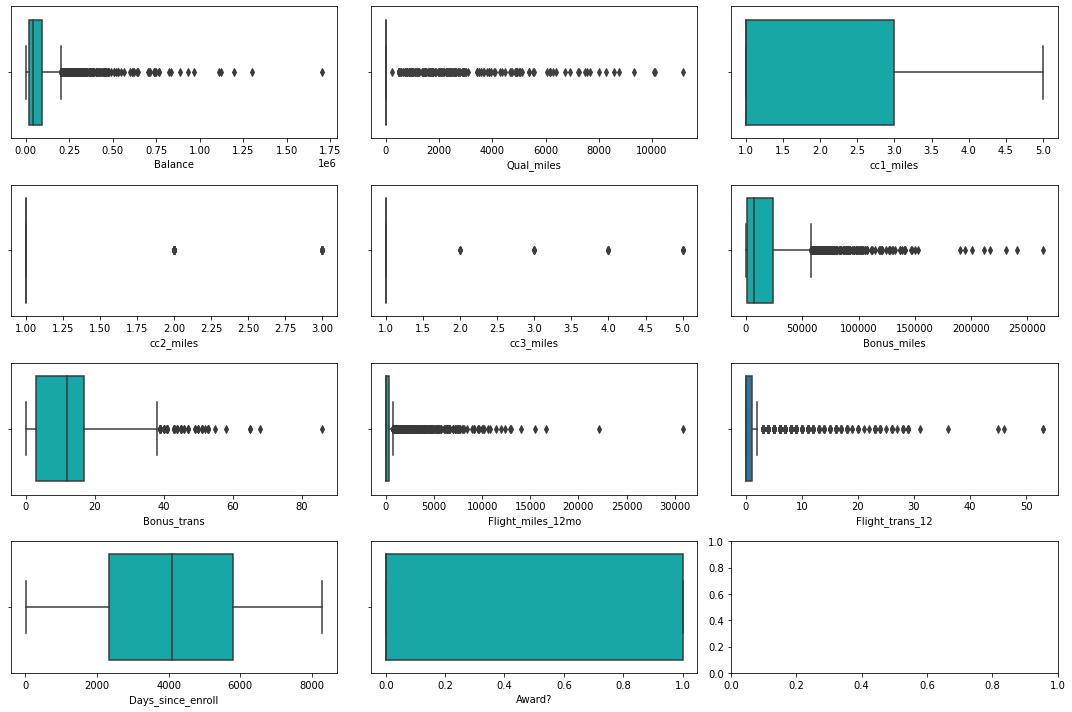

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(Airlines1.Balance, ax=ax[0,0],color='c')
sns.boxplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.boxplot(Airlines1.cc1_miles, ax=ax[0,2],color='c')
sns.boxplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.boxplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.boxplot(Airlines1.Bonus_miles, ax=ax[1,2],color='c')
sns.boxplot(Airlines1.Bonus_trans, ax=ax[2,0],color='c')
sns.boxplot(Airlines1.Flight_miles_12mo, ax=ax[2,1],color='c')
sns.boxplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.boxplot(Airlines1.Days_since_enroll, ax=ax[3,0],color='c')
sns.boxplot(Airlines1["Award?"] , ax=ax[3,1],color='c')
plt.tight_layout()
plt.show()

### Cheking if the data is normally distributed using distplot

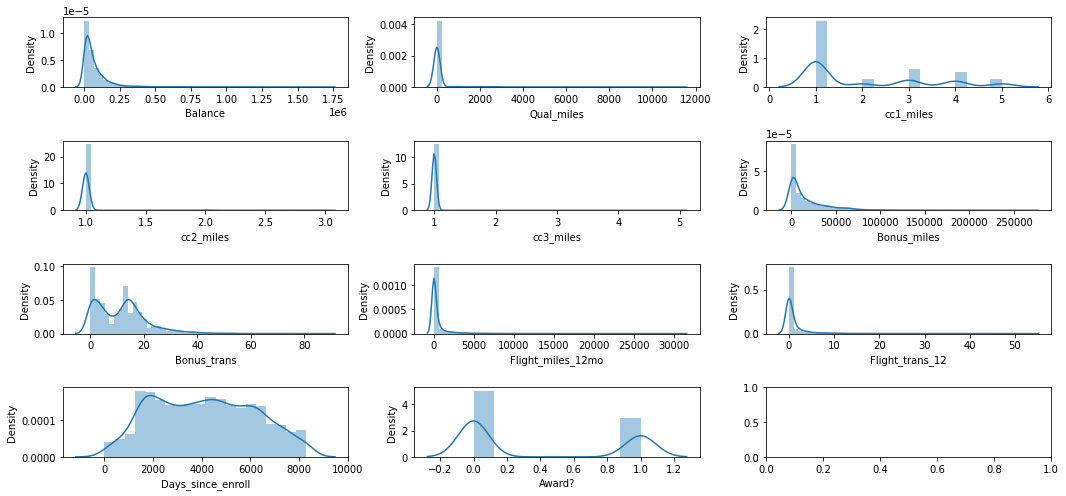

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(Airlines1.Balance, ax=ax[0,0])
sns.distplot(Airlines1.Qual_miles, ax=ax[0,1])
sns.distplot(Airlines1.cc1_miles, ax=ax[0,2])
sns.distplot(Airlines1.cc2_miles, ax=ax[1,0])
sns.distplot(Airlines1.cc3_miles, ax=ax[1,1])
sns.distplot(Airlines1.Bonus_miles, ax=ax[1,2])
sns.distplot(Airlines1.Bonus_trans, ax=ax[2,0])
sns.distplot(Airlines1.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(Airlines1. Flight_trans_12, ax=ax[2,2])
sns.distplot(Airlines1.Days_since_enroll, ax=ax[3,0])
sns.distplot(Airlines1["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

### Power transformation for standrising the distrubution

In [ ]:
Airlines2 = Airlines1[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
Airlines2_transformed = power_transform(Airlines2, method='yeo-johnson')

In [ ]:
Airlines2=pd.DataFrame(Airlines2_transformed,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"])
Airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


### Checking the normal distribution of the data, after Power transformation

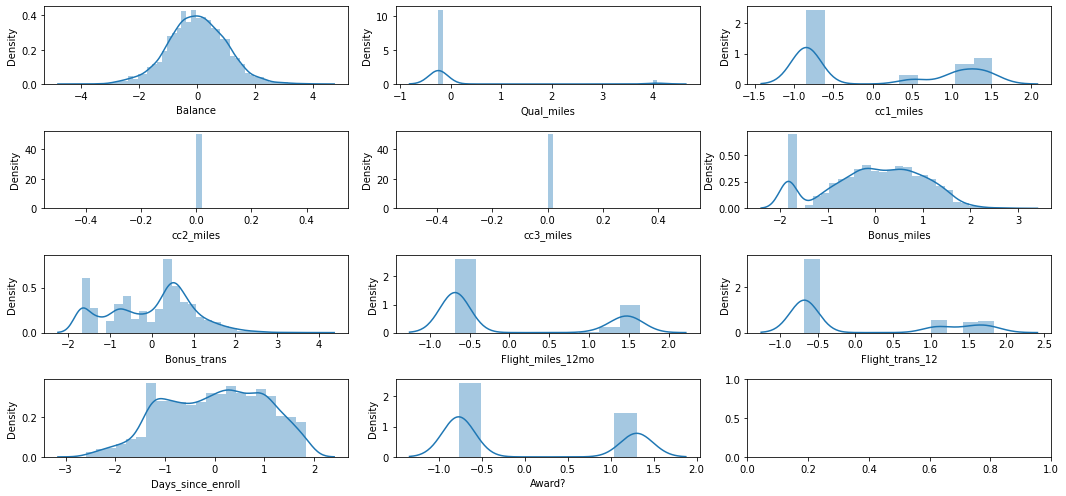

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(Airlines2.Balance, ax=ax[0,0])
sns.distplot(Airlines2.Qual_miles, ax=ax[0,1])
sns.distplot(Airlines2.cc1_miles, ax=ax[0,2])
sns.distplot(Airlines2.cc2_miles, ax=ax[1,0])
sns.distplot(Airlines2.cc3_miles, ax=ax[1,1])
sns.distplot(Airlines2.Bonus_miles, ax=ax[1,2])
sns.distplot(Airlines2.Bonus_trans, ax=ax[2,0])
sns.distplot(Airlines2.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(Airlines2.Flight_trans_12, ax=ax[2,2])
sns.distplot(Airlines2.Days_since_enroll, ax=ax[3,0])
sns.distplot(Airlines2["Award?"] , ax=ax[3,1])
plt.tight_layout()
plt.show()

## hierarchical clustering
### Applying average linkage method

Text(0.5, 1.0, 'Dendogram')

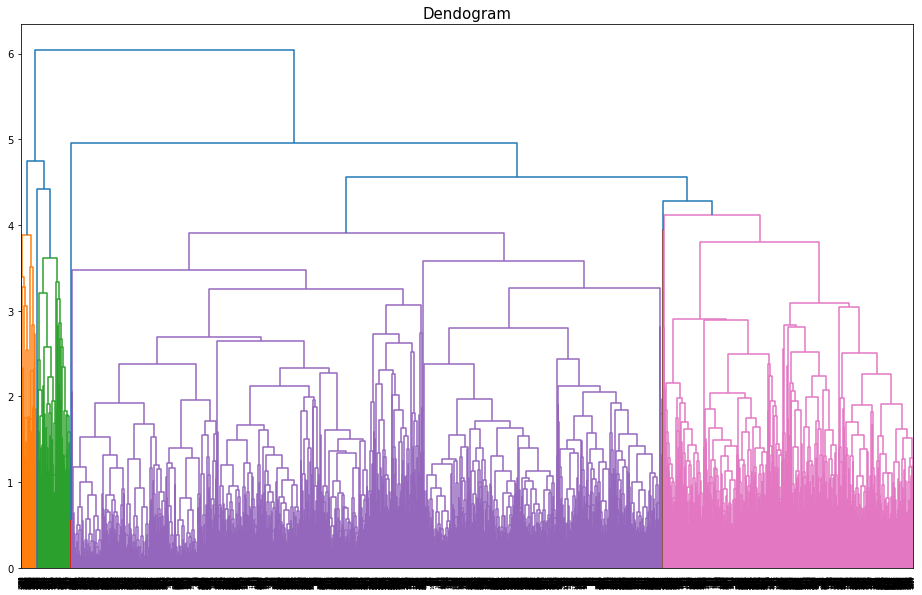

In [ ]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='average'))
plt.title("Dendogram",size=15)

### Creating Agglomerative Clustering

In [ ]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

### Fitting the data on the model

In [ ]:
y_hc1 = hc1.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

### Creating a new column cluster of the hierrachial cluster labels

In [ ]:
Airlines['cluster'] = y_hc1

In [ ]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


### Viewing how many categories are included in each cluster

In [ ]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2648



### Applying centroid(ward) linkage method

Text(0.5, 1.0, 'Dendogram')

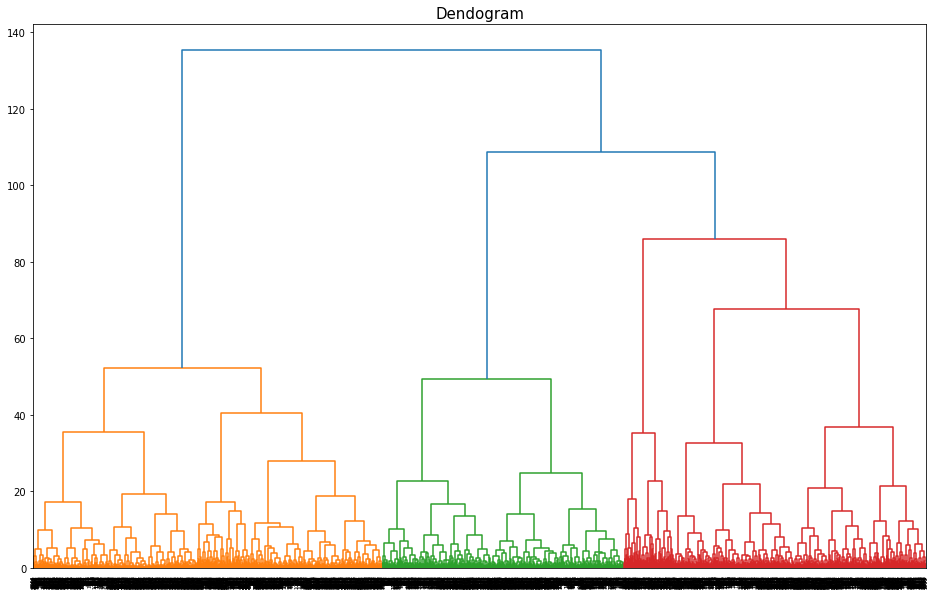

In [ ]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='ward'))
plt.title("Dendogram",size=15)

### Creating Cluster using centroid linkage method

In [ ]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

### Fitting the data on the hierarchial model that is created

In [ ]:
y_hc2 = hc2.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [ ]:
Airlines['cluster'] = y_hc2

In [ ]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


### Viewing how many categories are included in each cluster

In [ ]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1567

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



### Applying complete linkage method

Text(0.5, 1.0, 'Dendogram')

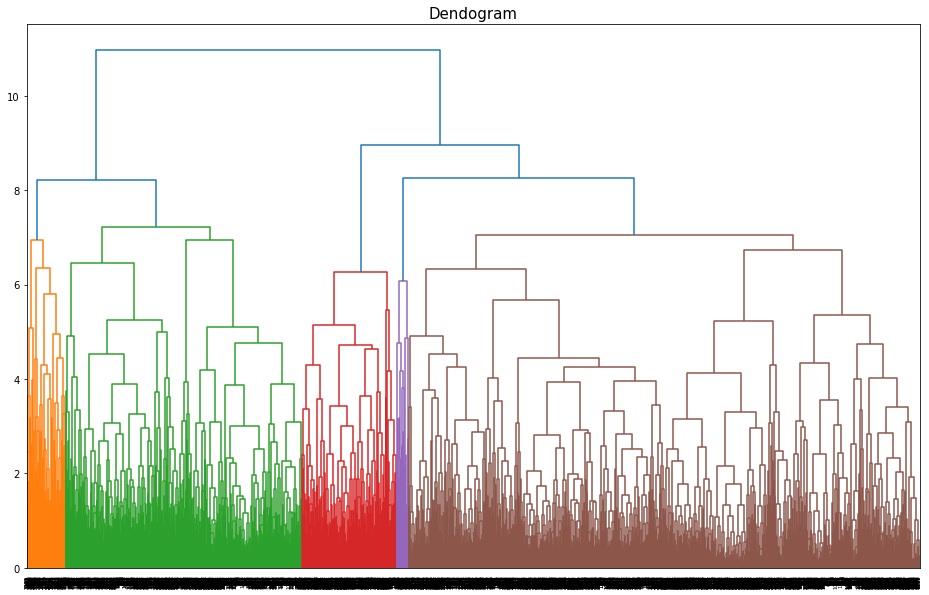

In [ ]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='complete'))
plt.title("Dendogram",size=15)

### Creatig Cluster using complete linkage method

In [ ]:
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [ ]:
y_hc3 = hc3.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

### Creating a cluster column in the dataset, that has categorised the data using hierrachial clustering

In [ ]:
Airlines['cluster'] = y_hc3

In [ ]:
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


### Viewing how many categories are included in each cluster

In [ ]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2288

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



### Applying single linkage method

Text(0.5, 1.0, 'Dendogram')

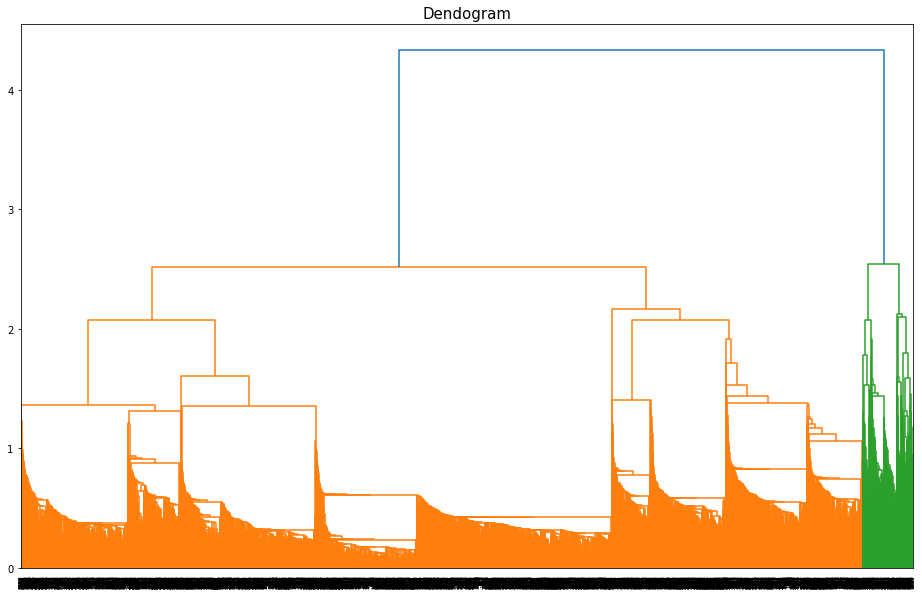

In [ ]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines2_transformed, method='single'))
plt.title("Dendogram",size=15)

### Creating a Cluster using single linkaghe method, fitting the data on the model and creating a new cluster column with cluster labels

In [ ]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(Airlines2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
Airlines['cluster'] = y_hc4
Airlines.groupby('cluster').agg(['mean']).reset_index()

,cluster,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,3018.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903
4,4,1889.258897,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


### Viewing how many categories are included in each cluster

In [ ]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2648

cluster 4
Total Members: 1124



## K-means clustering

### Plotting elbow curve

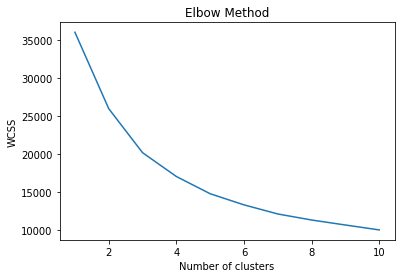

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Airlines2_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating a 5 group cluster, with Kmeans

In [ ]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(Airlines2_transformed)

KMeans(n_clusters=5, random_state=42)

In [ ]:
KM_label=clusters_new.labels_
Airlines['cluster'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.67521284, -0.23299118, -0.83559045,  0.        ,  0.        ,
        -0.90908093, -0.81943355, -0.68208419, -0.67377899, -0.31097105,
        -0.51403548],
       [ 0.3716131 , -0.2447433 ,  0.91050667,  0.        ,  0.        ,
         0.71778185,  0.59247143, -0.68330804, -0.67497033,  0.23901663,
         0.18155587],
       [ 0.01600745, -0.2447433 , -0.81923926,  0.        ,  0.        ,
        -0.27910528, -0.27226266,  1.45172819,  1.43587521, -0.09525881,
         0.07153496],
       [ 0.75450559, -0.2447433 ,  1.11374957,  0.        ,  0.        ,
         1.03665259,  1.04603128,  1.45646102,  1.41053352,  0.35829033,
         0.67251944],
       [ 0.59561724,  4.08591363,  0.06270738,  0.        ,  0.        ,
         0.37140654,  0.40074101,  0.79577474,  0.85126029,  0.15196421,
         0.59498281]])

In [ ]:
A=Airlines .iloc[:,1:].groupby('cluster').agg(['mean']).reset_index()

In [ ]:
A

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,28510.248982,8.273406,1.006784,1.015604,1.000000,2228.580054,4.679104,0.033921,0.000678,3501.601764,0.122117
1,1,89382.907549,0.000000,3.128923,1.011026,1.023749,27971.685327,16.074640,0.000000,0.000000,4593.606446,0.458015
2,2,69243.130890,0.000000,1.020942,1.026178,1.000000,5429.420593,8.059337,1211.178010,3.598604,3907.469459,0.404887
3,3,140109.272232,0.000000,3.607985,1.009074,1.034483,43060.114338,22.517241,1373.820327,4.096189,4849.402904,0.695100
4,4,135354.193694,2541.076577,2.207207,1.009009,1.009009,24601.418919,15.864865,1751.049550,5.283784,4422.950450,0.657658


### Viewing the number of categories in each cluster

In [ ]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(Airlines[Airlines['cluster'] == i]['ID#'].values)))
    print()

cluster 0
Total Members: 1474

cluster 1
Total Members: 1179

cluster 2
Total Members: 573

cluster 3
Total Members: 551

cluster 4
Total Members: 222



## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Airlines2)

DBSCAN(eps=0.8, min_samples=6)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])

In [ ]:
cl

,cluster_db
0,0
1,0
2,0
3,0
4,1
...,...
3994,3
3995,5
3996,4
3997,6


In [ ]:
Airlines3 = pd.concat([Airlines,cl],axis=1)

In [ ]:
Airlines3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,6


In [ ]:
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


# Importing the metrics for calculating silhouette score

In [ ]:
s1=(metrics.silhouette_score(Airlines2_transformed,y_hc1))
s1

0.24511194875209383

In [ ]:
s2=(metrics.silhouette_score(Airlines2_transformed,y_hc2))
s2

0.3240550069814065

In [ ]:
s3=(metrics.silhouette_score(Airlines2_transformed,y_hc3))
s3

0.19985213995606269

In [ ]:
s4=(metrics.silhouette_score(Airlines2_transformed,y_hc4))
s4

0.2971406781364072

In [ ]:
s5=(metrics.silhouette_score(Airlines2_transformed,clusters_new.labels_))
s5

0.32518610185189556

In [ ]:
s6=(metrics.silhouette_score(Airlines2_transformed,Airlines3.cluster_db))
s6

0.2340657983934542

### Consolidating:

In [ ]:
t={'Model':['Average','Centrod','Complete','Single','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Average,0.245112
1,Centrod,0.324055
2,Complete,0.199852
3,Single,0.297141
4,Kmeans,0.325186
5,DBScan,0.234066
